In [1]:
import matplotlib.pyplot as plt
import pandas as pd;
import numpy as np;

In [2]:
import matplotlib.pyplot as plt

def load_operation_logs(logName):
    folder = "../logs/backups/../"
    filename = folder + logName + ".log"
    df = pd.read_csv(filename, index_col=None, \
                     names = ["time", "operation", "round", "turn", "message", "startTime", "durationMs", "numStates", "numStatesScanned", "action", "actor"],\
                     dtype = {"operation" : str}, \
                     parse_dates = ["time", "startTime"])
    df["operation"] = df["operation"].str.strip()
    return df

all_operations = load_operation_logs("operationTime")
markov_operations = load_operation_logs("markovDecisionProcessTiming")

In [3]:
all_operations = load_operation_logs("operationTime")
per_round_df = all_operations[["operation", "round", "durationMs"]].groupby(["operation", "round"]).sum()
per_round_df

,,durationMs
operation,round,
ActionScheduler.calculateNextState(),0,5
ActionScheduler.getDecisionsFromActors(),0,120002
ActionScheduler.teachActors(),0,7
GameCanvas.render(),0,0
GameCanvas.run(),0,120023
GameCanvas.tick(),0,120020
actor.decide,0,16
actor.generateView,0,12
getDecisionFromActor,0,38


<AxesSubplot:xlabel='round'>

<Figure size 432x288 with 0 Axes>

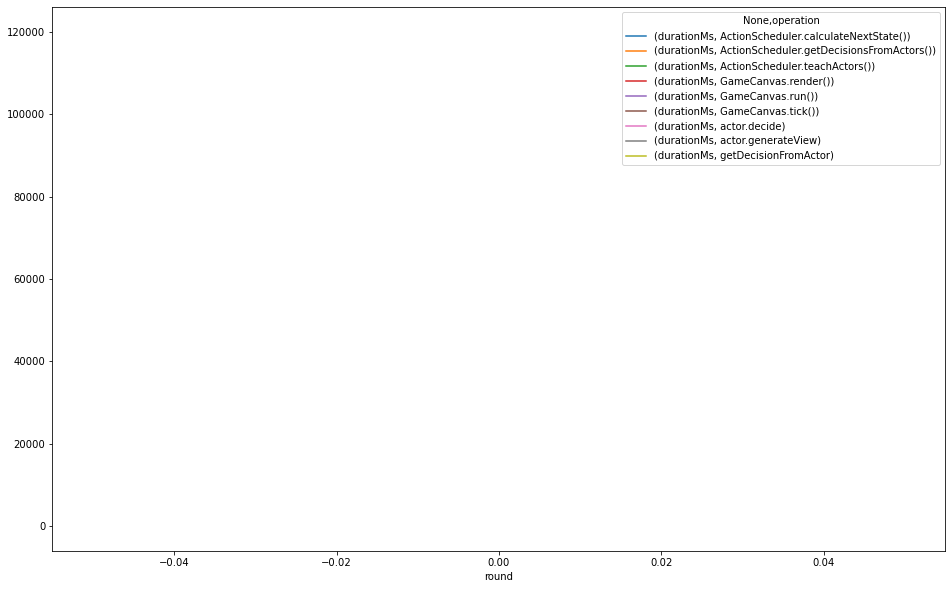

In [4]:
plt.figure()
per_round_df.unstack(level=0).plot(figsize=(16,10))